In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## EDA:

In [68]:
df = pd.read_excel('car_price_data.xlsx',index_col=0)

In [69]:
df

,Brand,Model,Variant,Manufacturing Year,Driven kilometers,Fuel Type,Number of owners,Location,Price (in ₹)
0,Hyundai,Verna,1.6 VTVT SX,2017.0,"64,685 KMs",Petrol,First,Faridabad,"8,25,000"
1,Hyundai,i10,Sportz 1.2 AT,2010.0,"38,798 KMs",Petrol,Second,Mumbai,"2,95,000"
2,Skoda,Rapid,1.6 MPI Active,2020.0,"19,922 KMs",Petrol,Second,Coimbatore,"8,75,000"
3,Toyota,Innova,2.5 V 8 STR,2009.0,"2,75,000 KMs",Diesel,First,Hyderabad,"6,65,000"
4,Maruti Suzuki,Wagon R,LXI ABS,2016.0,"49,679 KMs",Petrol,First,Faridabad,"3,45,000"
...,...,...,...,...,...,...,...,...,...
4995,Jeep,Compass,Limited Plus Petrol AT,2020.0,"23,500 KMs",Petrol,First,Delhi,"21,50,000"
4996,Skoda,Kodiaq,Style 2.0 TDI 4x4 AT,2017.0,"1,30,000 KMs",Diesel,First,Ahmedabad,"25,00,000"
4997,NaN,NaN,NaN,NaN,"55,740 KMs",Diesel,NaN,Coimbatore,"4,95,000"
4998,Maruti Suzuki,Swift DZire,VDI,2013.0,"95,000 KMs",Diesel,Second,Ahmedabad,"4,50,000"


In [70]:
#Removing 'KMs' substring from Driven kilometers data
df['Driven kilometers'] = [j.split(" ")[0] for j in df['Driven kilometers']]

In [71]:
#Removing comma from Driven kilometers data and Price (in ₹) data
df['Driven kilometers'] = [j.replace(',','') for j in df['Driven kilometers']]
df['Price (in ₹)'] = [j.replace(',','') for j in df['Price (in ₹)']]

In [72]:
df

,Brand,Model,Variant,Manufacturing Year,Driven kilometers,Fuel Type,Number of owners,Location,Price (in ₹)
0,Hyundai,Verna,1.6 VTVT SX,2017.0,64685,Petrol,First,Faridabad,825000
1,Hyundai,i10,Sportz 1.2 AT,2010.0,38798,Petrol,Second,Mumbai,295000
2,Skoda,Rapid,1.6 MPI Active,2020.0,19922,Petrol,Second,Coimbatore,875000
3,Toyota,Innova,2.5 V 8 STR,2009.0,275000,Diesel,First,Hyderabad,665000
4,Maruti Suzuki,Wagon R,LXI ABS,2016.0,49679,Petrol,First,Faridabad,345000
...,...,...,...,...,...,...,...,...,...
4995,Jeep,Compass,Limited Plus Petrol AT,2020.0,23500,Petrol,First,Delhi,2150000
4996,Skoda,Kodiaq,Style 2.0 TDI 4x4 AT,2017.0,130000,Diesel,First,Ahmedabad,2500000
4997,NaN,NaN,NaN,NaN,55740,Diesel,NaN,Coimbatore,495000
4998,Maruti Suzuki,Swift DZire,VDI,2013.0,95000,Diesel,Second,Ahmedabad,450000


In [73]:
#Column Data type in dataframe 
df.dtypes

Brand                  object
Model                  object
Variant                object
Manufacturing Year    float64
Driven kilometers      object
Fuel Type              object
Number of owners       object
Location               object
Price (in ₹)           object
dtype: object

#### Point to note here is that all columns are not numeric

In [74]:
#Converting datatype for Driven kilometers and Price (in ₹) columns
df = df.astype({'Driven kilometers':'float','Price (in ₹)':'float'})

In [76]:
df

,Brand,Model,Variant,Manufacturing Year,Driven kilometers,Fuel Type,Number of owners,Location,Price (in ₹)
0,Hyundai,Verna,1.6 VTVT SX,2017.0,64685.0,Petrol,First,Faridabad,825000.0
1,Hyundai,i10,Sportz 1.2 AT,2010.0,38798.0,Petrol,Second,Mumbai,295000.0
2,Skoda,Rapid,1.6 MPI Active,2020.0,19922.0,Petrol,Second,Coimbatore,875000.0
3,Toyota,Innova,2.5 V 8 STR,2009.0,275000.0,Diesel,First,Hyderabad,665000.0
4,Maruti Suzuki,Wagon R,LXI ABS,2016.0,49679.0,Petrol,First,Faridabad,345000.0
...,...,...,...,...,...,...,...,...,...
4995,Jeep,Compass,Limited Plus Petrol AT,2020.0,23500.0,Petrol,First,Delhi,2150000.0
4996,Skoda,Kodiaq,Style 2.0 TDI 4x4 AT,2017.0,130000.0,Diesel,First,Ahmedabad,2500000.0
4997,NaN,NaN,NaN,NaN,55740.0,Diesel,NaN,Coimbatore,495000.0
4998,Maruti Suzuki,Swift DZire,VDI,2013.0,95000.0,Diesel,Second,Ahmedabad,450000.0


In [77]:
#Statistical summary
df.describe()

,Manufacturing Year,Driven kilometers,Price (in ₹)
count,4621.000000,5.000000e+03,5.000000e+03
mean,2016.674097,4.847137e+04,1.731232e+06
std,3.055022,5.403355e+04,2.403420e+06
min,1998.000000,7.000000e+01,9.000000e+04
25%,2015.000000,2.338625e+04,5.450000e+05
50%,2017.000000,4.200000e+04,8.650000e+05
75%,2019.000000,6.357900e+04,1.850000e+06
max,2022.000000,1.460000e+06,3.900000e+07


In [78]:
df.shape

(5000, 9)

#### We have 5000 data rows and 9 columns in the dataframe.

### Target variable is Price (in ₹)

### Checking Null values in Training Dataframe:

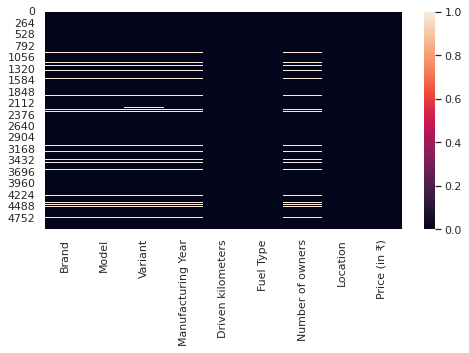

In [79]:
#Checking null values using heatmap
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull())
plt.show()

In [80]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

1912

In [81]:
#number of null values in each column
df.isnull().sum()

Brand                 379
Model                 379
Variant               396
Manufacturing Year    379
Driven kilometers       0
Fuel Type               0
Number of owners      379
Location                0
Price (in ₹)            0
dtype: int64

### As we can't fill brand, model, variant with mode of data as it doesn't make sense hence dropping rows with NULL values

In [82]:
df = df.dropna()

In [83]:
#Total number of null values in complete dataset
df.isnull().sum().sum()

0

In [84]:
df.shape

(4604, 9)

#### Now There is no NULL values in dataframe

### Histogram Plots :

In [85]:
#Making dataframe of nominal data
df_visualisation_nominal = df[['Brand','Model','Variant','Manufacturing Year','Fuel Type','Number of owners','Location']].copy()

Maruti Suzuki    913
Hyundai          781
Honda            477
Mercedes-Benz    331
BMW              266
Audi             231
Mahindra         196
Toyota           187
Volkswagen       167
Tata             144
Renault          139
Ford             135
Skoda            117
Kia               91
MG                84
Volvo             61
Jeep              59
Land Rover        56
Nissan            36
Porsche           32
Jaguar            27
Chevrolet         19
Datsun            18
MINI              16
Bentley            8
Mitsubishi         6
Rolls-Royce        2
Lexus              2
Ferrari            2
Maserati           1
Name: Brand, dtype: int64


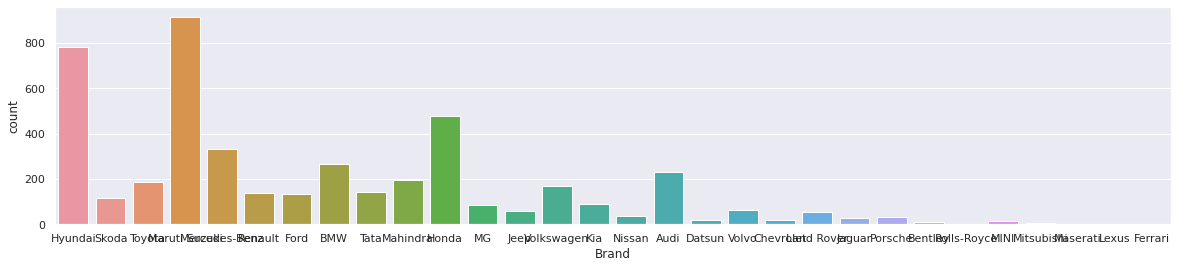

In [86]:
#Visualisation of Brand data
sns.set(rc={'figure.figsize':(20,4)})
ax = sns.countplot(x='Brand',data=df_visualisation_nominal)
print(df_visualisation_nominal['Brand'].value_counts())

**As we can see most demand is for Maruti Suzuki and Hyundai and the rest are low in demand**

City          170
Grand i10     150
Wagon R       121
Elite i20     112
Creta         112
             ... 
Karoq           1
Yeti            1
Sail Sedan      1
Camaro          1
NX              1
Name: Model, Length: 227, dtype: int64


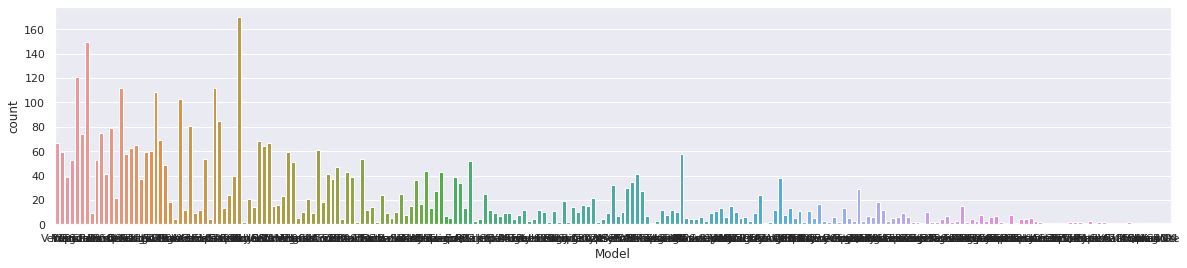

In [87]:
#Visualisation of Model data
ax = sns.countplot(x='Model',data=df_visualisation_nominal)
print(df_visualisation_nominal['Model'].value_counts())

**As we can see that highest demand is for City, then Grand i10, and so on**

2017.0    657
2018.0    622
2016.0    524
2019.0    522
2020.0    434
2015.0    434
2021.0    333
2014.0    297
2013.0    236
2012.0    148
2011.0    135
2010.0     84
2022.0     84
2009.0     35
2008.0     29
2007.0     20
2006.0      8
2005.0      1
1998.0      1
Name: Manufacturing Year, dtype: int64


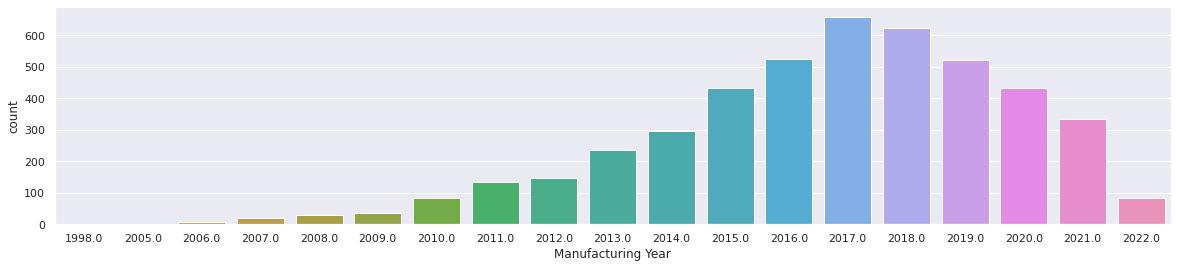

In [88]:
#Visualisation of Manufacturing Year data
ax = sns.countplot(x='Manufacturing Year',data=df_visualisation_nominal)
print(df_visualisation_nominal['Manufacturing Year'].value_counts())

**As we can see that most cars are manufactured around 2017**

Petrol      2739
Diesel      1750
CNG          103
Electric       6
Hybrid         6
Name: Fuel Type, dtype: int64


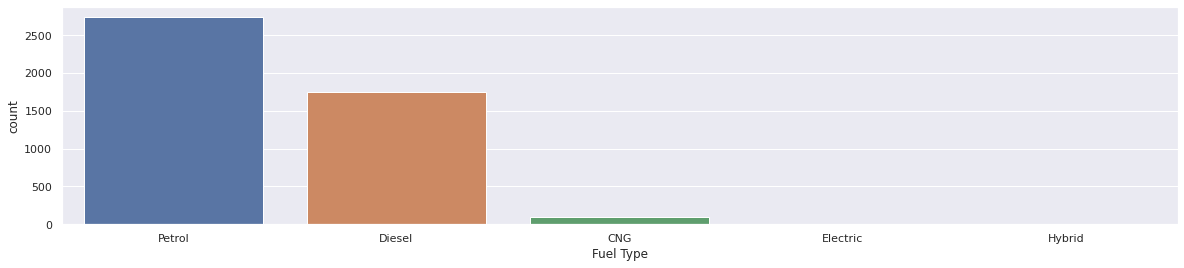

In [89]:
#Visualisation of Fuel Type data
ax = sns.countplot(x='Fuel Type',data=df_visualisation_nominal)
print(df_visualisation_nominal['Fuel Type'].value_counts())

**Almost all cars are either petrol or deisel in this dataframe, rest are negligible**

First           3834
Second           683
Third             71
UnRegistered      15
Fourth             1
Name: Number of owners, dtype: int64


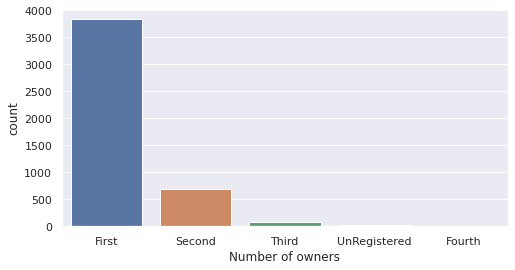

In [90]:
#Visualisation of Number of owners data
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(x='Number of owners',data=df_visualisation_nominal)
print(df_visualisation_nominal['Number of owners'].value_counts())

**Almost all cars are sold by their first owner, some by second, and rest are negligible**

Mumbai          874
Delhi           516
Pune            505
Bangalore       476
Ahmedabad       458
Thane           271
Coimbatore      214
Chennai         176
Nashik          119
Kanpur          109
Salem            92
Aurangabad       81
Gurgaon          79
Dak. Kannada     58
Mangalore        58
Kolkata          52
Hyderabad        51
Navi Mumbai      46
Mysore           44
Muzaffurpur      40
Dharwad          31
Jamshedpur       31
Ranchi           26
Lucknow          25
Vadodara         23
Nagpur           22
Noida            22
Bhopal           21
Ajmer            20
Faridabad        15
Goa              13
Chandigarh        8
Dharmapuri        7
Patna             7
Vijaywada         6
Varanasi          4
Dehradun          2
Ghaziabad         1
Meerut            1
Name: Location, dtype: int64


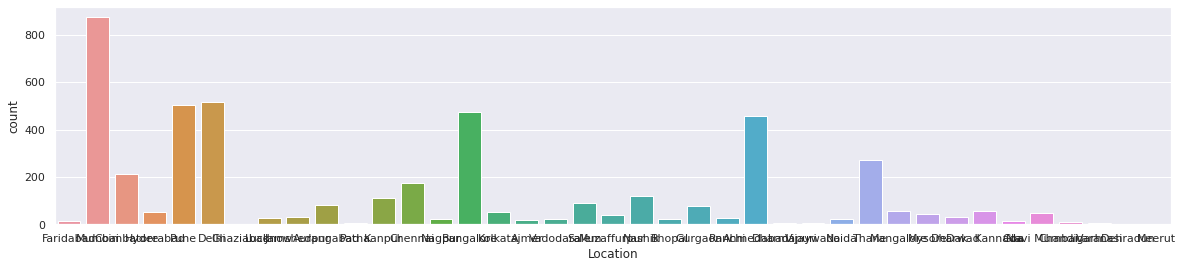

In [91]:
#Visualisation of Location data
sns.set(rc={'figure.figsize':(20,4)})
ax = sns.countplot(x='Location',data=df_visualisation_nominal)
print(df_visualisation_nominal['Location'].value_counts())

**Most cars are sold in big cities like Mumbai, Delhi, Pune, banglore and Ahmedabad**

### Density Plots:

In [92]:
#Making dataframe of Continous data
df_visualisation_continous = df[['Driven kilometers','Price (in ₹)']].copy()

<AxesSubplot:xlabel='Driven kilometers', ylabel='Density'>

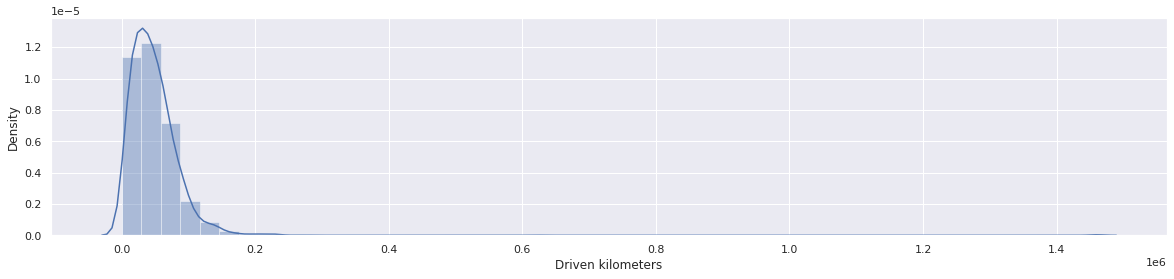

In [93]:
#Visualisation of Age data
sns.distplot(df_visualisation_continous['Driven kilometers'])

**Above graph looks skewed right with mode around 50000 kms**

<AxesSubplot:xlabel='Price (in ₹)', ylabel='Density'>

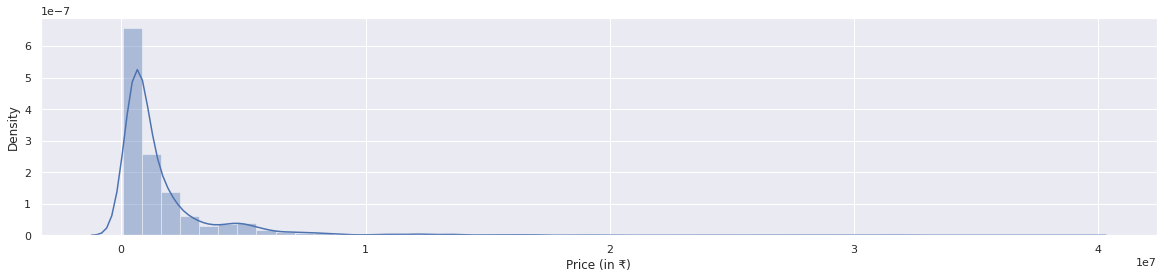

In [94]:
#Visualisation of Age data
sns.distplot(df_visualisation_continous['Price (in ₹)'])

**Above graph looks seked right with near at ₹10,00,000**

#### Visualisation is completed

### Encoding of Both training and testing Dataframe(Converting String to numeric):

In [95]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [96]:
for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [97]:
df

,Brand,Model,Variant,Manufacturing Year,Driven kilometers,Fuel Type,Number of owners,Location,Price (in ₹)
0,8.0,195.0,60.0,2017.0,64685.0,4.0,0.0,13.0,825000.0
1,8.0,224.0,795.0,2010.0,38798.0,4.0,2.0,24.0,295000.0
2,25.0,151.0,50.0,2020.0,19922.0,4.0,2.0,7.0,875000.0
3,27.0,111.0,138.0,2009.0,275000.0,1.0,0.0,17.0,665000.0
4,17.0,200.0,562.0,2016.0,49679.0,4.0,0.0,13.0,345000.0
...,...,...,...,...,...,...,...,...,...
4994,22.0,7.0,346.0,2018.0,5800.0,4.0,0.0,10.0,9500000.0
4995,10.0,54.0,583.0,2020.0,23500.0,4.0,0.0,10.0,2150000.0
4996,25.0,118.0,823.0,2017.0,130000.0,1.0,0.0,0.0,2500000.0
4998,17.0,175.0,889.0,2013.0,95000.0,1.0,2.0,0.0,450000.0


### Correlations:

<AxesSubplot:>

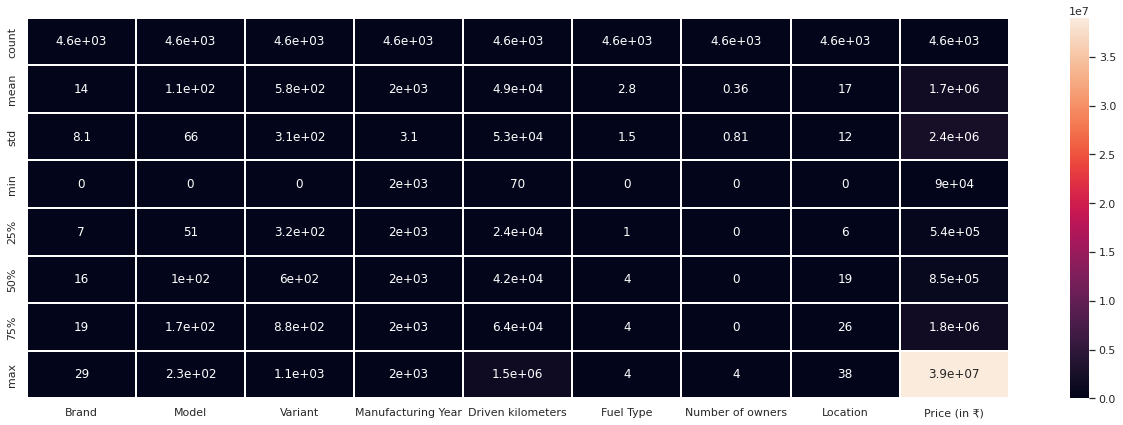

In [98]:
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True, linewidths=0.1)

In [99]:
#Correlation matrix
df.corr()

,Brand,Model,Variant,Manufacturing Year,Driven kilometers,Fuel Type,Number of owners,Location,Price (in ₹)
Brand,1.000000,0.189433,0.009341,0.034417,0.062718,-0.013552,-0.000821,0.024864,-0.071450
Model,0.189433,1.000000,0.260782,0.040512,0.034292,-0.049263,-0.009732,-0.017712,-0.061496
Variant,0.009341,0.260782,1.000000,0.121269,-0.037031,0.106619,-0.112088,0.002176,-0.139080
Manufacturing Year,0.034417,0.040512,0.121269,1.000000,-0.359649,0.060954,-0.306208,-0.067450,0.262275
Driven kilometers,0.062718,0.034292,-0.037031,-0.359649,1.000000,-0.214791,0.143295,0.064176,-0.149525
Fuel Type,-0.013552,-0.049263,0.106619,0.060954,-0.214791,1.000000,-0.093593,-0.024604,-0.129010
Number of owners,-0.000821,-0.009732,-0.112088,-0.306208,0.143295,-0.093593,1.000000,-0.029844,0.023259
Location,0.024864,-0.017712,0.002176,-0.067450,0.064176,-0.024604,-0.029844,1.000000,-0.051536
Price (in ₹),-0.071450,-0.061496,-0.139080,0.262275,-0.149525,-0.129010,0.023259,-0.051536,1.000000


<AxesSubplot:>

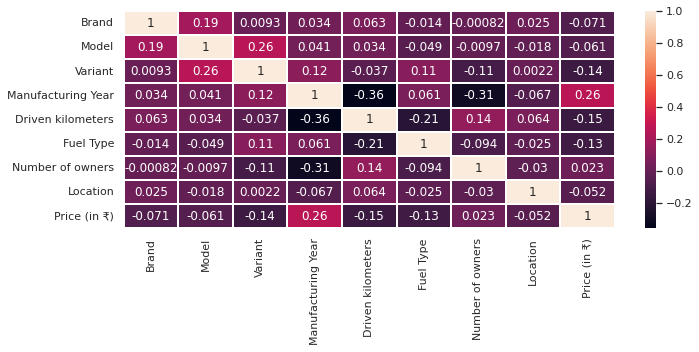

In [100]:
#Correlation of Columns with target column using heatmap
plt.figure(figsize = (11,4))
sns.heatmap(df.corr(),annot = True, linewidths=0.1)

#### Here we can't see very high correlations as highest correlation present here is 0.26.

### Checking columns which appear to be highly correlated with target columns

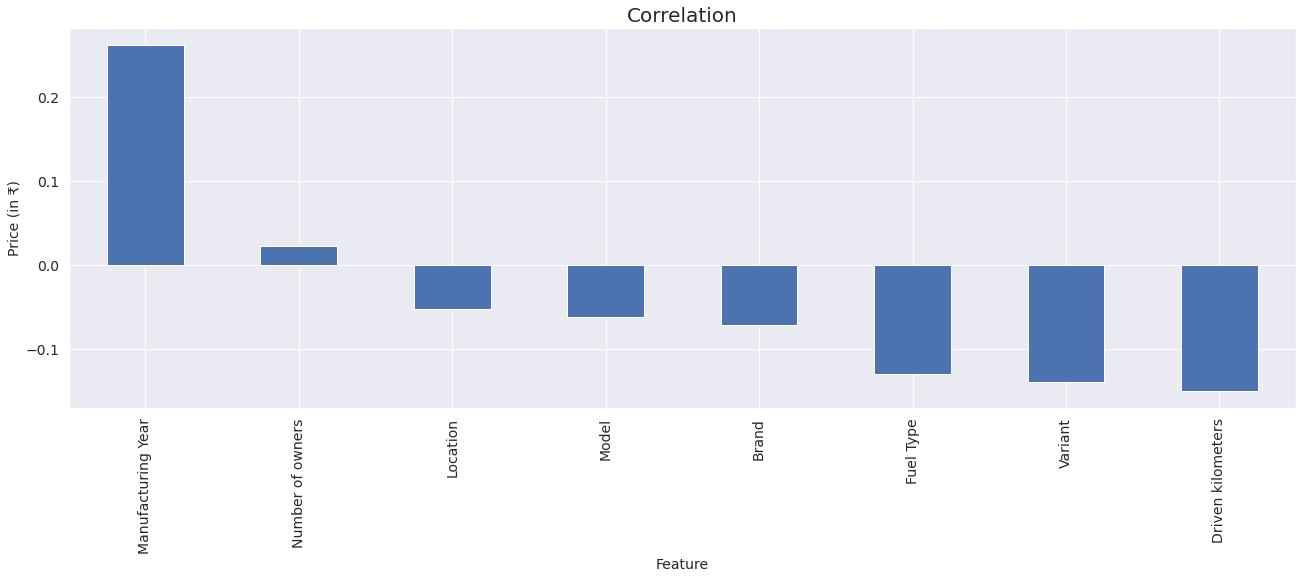

In [101]:
plt.figure(figsize=(22,7))
df.corr()['Price (in ₹)'].sort_values(ascending = False).drop(['Price (in ₹)']).plot(kind='bar',fontsize=14)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Price (in ₹)',fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

#### Here we can't see any high correlation with target column

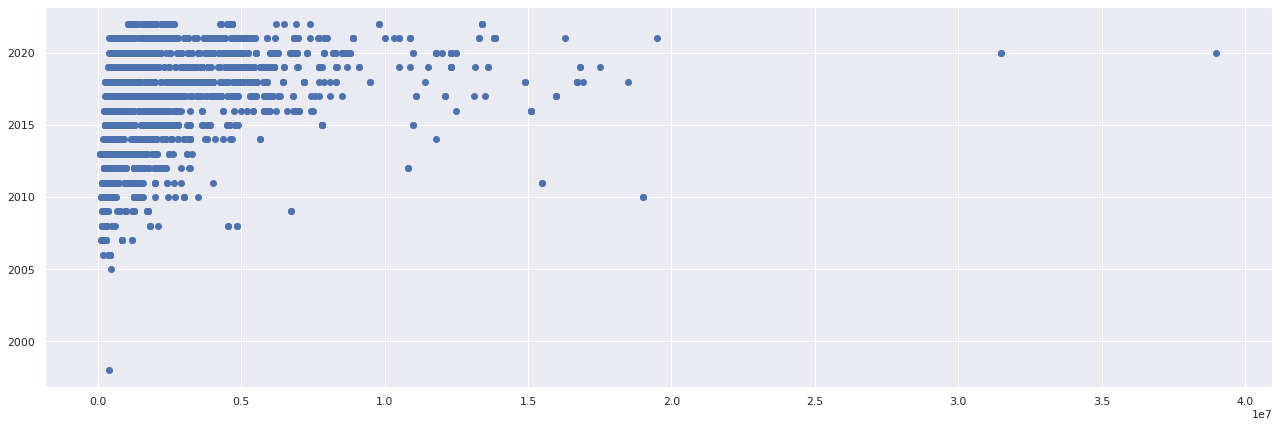

In [102]:
#Checking correlation between Price (in ₹) and Manufacturing Year
plt.figure(figsize=(22,7))
plt.scatter(df['Price (in ₹)'],df['Manufacturing Year'])
plt.show()

#### We can't see any high correlations here

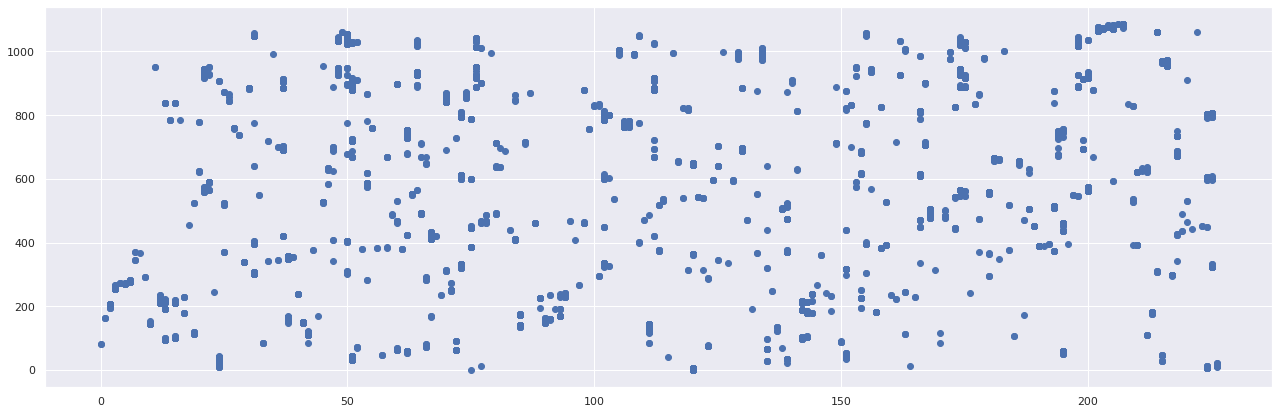

In [103]:
#Checking correlation between Model and Variant
plt.figure(figsize=(22,7))
plt.scatter(df.Model,df.Variant)
plt.show()

#### We can't see any high collinearity here

### Checkin VIF for confirmation of above conclusion:

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [105]:
X1 = df[['Price (in ₹)', 'Manufacturing Year']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X1.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

In [106]:
print(vif_dF)

              feature       VIF
0        Price (in ₹)  1.519806
1  Manufacturing Year  1.519806


### As we can see there is no high correlation(<10)

In [107]:
X2 = df[['Model','Variant']]

# VIF dataframe
vif_dF = pd.DataFrame()
vif_dF["feature"] = X2.columns
  
# calculating VIF for each feature
vif_dF["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

In [108]:
print(vif_dF)

   feature       VIF
0    Model  3.020373
1  Variant  3.020373


### As we can see here correlation is not high (<10)

### Removing Skewness :

In [109]:
#Checking skewness
df.skew()

Brand                  0.136470
Model                  0.153751
Variant               -0.203913
Manufacturing Year    -0.694481
Driven kilometers     16.679011
Fuel Type             -0.426434
Number of owners       1.995534
Location               0.004416
Price (in ₹)           4.555661
dtype: float64

#### Acceptable skewness (-0.65,+0.65)

In [110]:
#Removing skewness from 'Driven kilometers'
from scipy.stats import yeojohnson
df['Driven kilometers'] = yeojohnson(df['Driven kilometers'])[0]

In [111]:
#Checking skewness
df.skew()

Brand                 0.136470
Model                 0.153751
Variant              -0.203913
Manufacturing Year   -0.694481
Driven kilometers     0.166319
Fuel Type            -0.426434
Number of owners      1.995534
Location              0.004416
Price (in ₹)          4.555661
dtype: float64

#### All continous columns (excluding target variable) are now in acceptable skew range 

### Removing outliers :

In [112]:
#Outlier check
df.dtypes

Brand                 float64
Model                 float64
Variant               float64
Manufacturing Year    float64
Driven kilometers     float64
Fuel Type             float64
Number of owners      float64
Location              float64
Price (in ₹)          float64
dtype: object

Brand                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Model                 AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Variant               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Manufacturing Year       AxesSubplot(0.125,0.391471;0.227941x0.222059)
Driven kilometers     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Fuel Type             AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Number of owners            AxesSubplot(0.125,0.125;0.227941x0.222059)
Location                 AxesSubplot(0.398529,0.125;0.227941x0.222059)
Price (in ₹)             AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

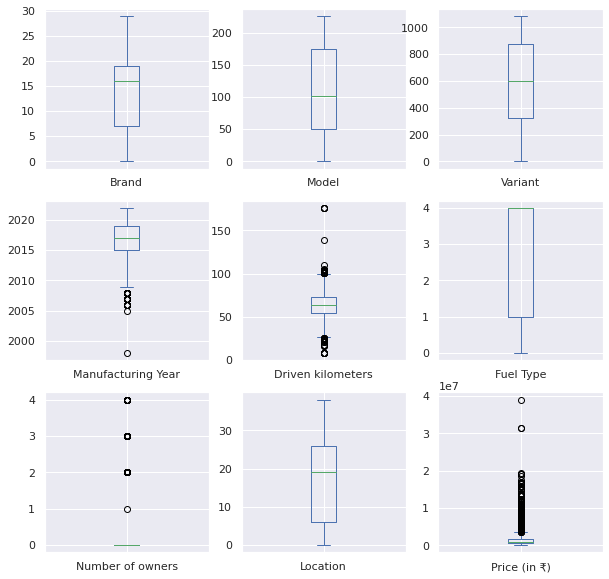

In [113]:
#Checking only for continous data types
df.plot.box(layout =(3,3),subplots=True,figsize=(10,10))

### There looks like outliers in some columns so now we check with z-score:

In [114]:
#Outlier removal using z-score
df.shape

(4604, 9)

In [115]:
from scipy.stats import zscore

z = np.abs(zscore(df))
threshhold = 3
np.where(z>3)

(array([   3,  131,  132,  132,  150,  151,  151,  208,  225,  322,  333,
         378,  399,  456,  460,  561,  567,  579,  583,  596,  600,  604,
         605,  662,  663,  852,  881,  882,  888,  892,  894,  919,  929,
         930,  952,  953,  956,  957,  991, 1012, 1029, 1029, 1060, 1106,
        1111, 1138, 1139, 1143, 1149, 1149, 1150, 1150, 1166, 1244, 1262,
        1277, 1309, 1364, 1365, 1366, 1368, 1369, 1370, 1371, 1450, 1461,
        1462, 1469, 1491, 1498, 1535, 1555, 1602, 1606, 1614, 1643, 1667,
        1678, 1682, 1686, 1687, 1711, 1713, 1718, 1723, 1730, 1732, 1735,
        1752, 1758, 1785, 1789, 1890, 1960, 1974, 1975, 1976, 2001, 2005,
        2040, 2073, 2102, 2102, 2124, 2125, 2135, 2145, 2146, 2163, 2172,
        2231, 2238, 2263, 2267, 2271, 2280, 2284, 2321, 2321, 2322, 2437,
        2442, 2481, 2484, 2487, 2488, 2491, 2507, 2508, 2509, 2509, 2510,
        2511, 2512, 2512, 2527, 2531, 2545, 2558, 2600, 2606, 2614, 2634,
        2656, 2657, 2677, 2681, 2700, 

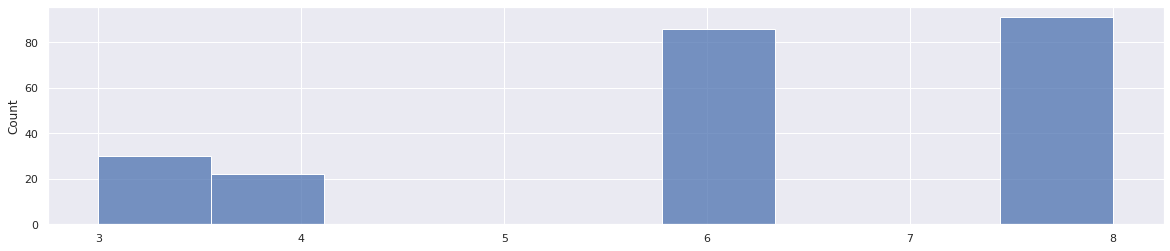

In [117]:
# Number of outliers in each column
sns.histplot(np.where(z>3)[1])
plt.show()

In [127]:
#Removing outlier from column 4 ('Driven kilometers') as it the only continous data column other than target variable
df_new_z = df.copy()
df_new_z = df_new_z[(np.abs(zscore(df['Driven kilometers'])) < 3)]
df_new_z

,Brand,Model,Variant,Manufacturing Year,Driven kilometers,Fuel Type,Number of owners,Location,Price (in ₹)
0,8.0,195.0,60.0,2017.0,72.673920,4.0,0.0,13.0,825000.0
1,8.0,224.0,795.0,2010.0,62.677332,4.0,2.0,24.0,295000.0
2,25.0,151.0,50.0,2020.0,51.582457,4.0,2.0,7.0,875000.0
4,17.0,200.0,562.0,2016.0,67.336939,4.0,0.0,13.0,345000.0
5,17.0,200.0,918.0,2016.0,76.981768,4.0,0.0,32.0,400000.0
...,...,...,...,...,...,...,...,...,...
4994,22.0,7.0,346.0,2018.0,35.708294,4.0,0.0,10.0,9500000.0
4995,10.0,54.0,583.0,2020.0,54.145542,4.0,0.0,10.0,2150000.0
4996,25.0,118.0,823.0,2017.0,88.802129,1.0,0.0,0.0,2500000.0
4998,17.0,175.0,889.0,2013.0,81.171189,1.0,2.0,0.0,450000.0


In [128]:
df_new_z.shape

(4582, 9)

In [129]:
#Data Loss
Data_loss = (4604-4528)/4604*100
Data_loss

1.6507384882710685

#### Now we got no outlier in continous data and data loss is only 1.65%

## Separating the columns into features and target for 'Price (in ₹)' target variable:

In [130]:
feature = df_new_z.drop("Price (in ₹)",axis=1)
target = df_new_z["Price (in ₹)"]

In [131]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [132]:
import warnings
warnings.filterwarnings('ignore')

### Model 1:

In [133]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [134]:
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(r2_score(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(r2_score(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 0.16482520983492188
At random state 0 the testing accuracy is : 0.1477559904165895


At random state 1 the training accuracy is : 0.168220086604002
At random state 1 the testing accuracy is : 0.13062723428316514


At random state 2 the training accuracy is : 0.1646002834614324
At random state 2 the testing accuracy is : 0.14701454895591104


At random state 3 the training accuracy is : 0.15381097318885273
At random state 3 the testing accuracy is : 0.19191158230017735


At random state 4 the training accuracy is : 0.15837196021247346
At random state 4 the testing accuracy is : 0.17176251516781027


At random state 5 the training accuracy is : 0.15824007494116687
At random state 5 the testing accuracy is : 0.16877038500415842


At random state 6 the training accuracy is : 0.1567739603727587
At random state 6 the testing accuracy is : 0.1738449297769873


At random state 7 the training accuracy is : 0.16383619784543546
At random state 7 the te

In [135]:
features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 7)

In [136]:
lr.fit(features_train,target_train)

LinearRegression()

In [137]:
pred_test = lr.predict(features_test)

In [138]:
print(r2_score(target_test,pred_test))

0.1469071923098223


### Cross Validation of model:

In [139]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)

In [140]:
for j in range(2,10):
    cv_score = cross_val_score(lr,feature,target,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
    print("\n")

At cross fold 2 the cv score is 0.15704804394672922 and accuracy score for training is -0.1580800000323732 and accuracy score for testing is 0.1469071923098223


At cross fold 3 the cv score is 0.14251423349721704 and accuracy score for training is -0.1580800000323732 and accuracy score for testing is 0.1469071923098223


At cross fold 4 the cv score is 0.15053078379631382 and accuracy score for training is -0.1580800000323732 and accuracy score for testing is 0.1469071923098223


At cross fold 5 the cv score is 0.05457718263550189 and accuracy score for training is -0.1580800000323732 and accuracy score for testing is 0.1469071923098223


At cross fold 6 the cv score is -0.19180015405523898 and accuracy score for training is -0.1580800000323732 and accuracy score for testing is 0.1469071923098223


At cross fold 7 the cv score is -0.15825706428065295 and accuracy score for training is -0.1580800000323732 and accuracy score for testing is 0.1469071923098223


At cross fold 8 the cv sco

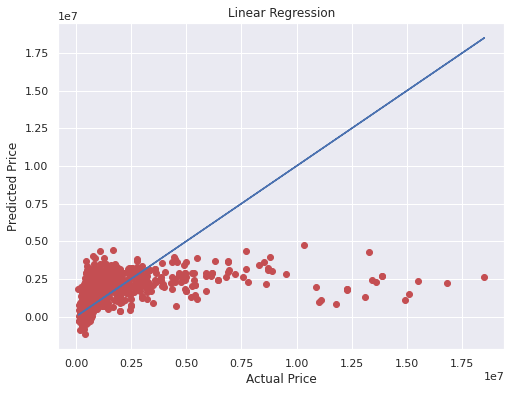

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test, color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression')
plt.show()

We can see almost all points lie near best fit curve

### Regularization using Lasso:

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [151]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [152]:
ls = Lasso(alpha = 0.0001, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.17834298589182485

In [153]:
cv_score = cross_val_score(ls,feature,target,cv=6)
cv_mean =cv_score.mean()
abs(cv_mean)

0.19180015403239356

### Trying other models:

In [142]:
def model_selection(algorithm_instance,features_train,target_train,features_test,target_test):
    algorithm_instance.fit(features_train,target_train)
    model_1_pred_train = algorithm_instance.predict(features_train)
    model_1_pred_test = algorithm_instance.predict(features_test)
    print("Accuracy for the training model : ",r2_score(target_train,model_1_pred_train))
    print("Accuracy for the testing model : ",r2_score(target_test,model_1_pred_test))
    
    Train_accuracy = r2_score(target_train,model_1_pred_train)
    Test_accuracy = r2_score(target_test,model_1_pred_test)
    
    for j in range(2,10):
        cv_score = cross_val_score(algorithm_instance,feature,target,cv=j)
        cv_mean = cv_score.mean()
        print("At cross fold " + str(j) + " the cv score is " + str(cv_mean) + " and accuracy score for training is " + str(Train_accuracy) + " and accuracy score for testing is " + str(Test_accuracy))
        print("\n")

### Model 2:

In [143]:
import xgboost as xgb
model_selection(xgb.XGBRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.9961851349226554
Accuracy for the testing model :  0.9265178930964354
At cross fold 2 the cv score is 0.8990860301596872 and accuracy score for training is 0.9961851349226554 and accuracy score for testing is 0.9265178930964354


At cross fold 3 the cv score is 0.8928065106554822 and accuracy score for training is 0.9961851349226554 and accuracy score for testing is 0.9265178930964354


At cross fold 4 the cv score is 0.8851020326046491 and accuracy score for training is 0.9961851349226554 and accuracy score for testing is 0.9265178930964354


At cross fold 5 the cv score is 0.8801595462386809 and accuracy score for training is 0.9961851349226554 and accuracy score for testing is 0.9265178930964354


At cross fold 6 the cv score is 0.8833257830703712 and accuracy score for training is 0.9961851349226554 and accuracy score for testing is 0.9265178930964354


At cross fold 7 the cv score is 0.8816421915415581 and accuracy score for training is 0.99618

### Model 3:

In [144]:
from sklearn.ensemble import RandomForestRegressor
model_selection(RandomForestRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.9866976687986722
Accuracy for the testing model :  0.8840525978432557
At cross fold 2 the cv score is 0.8635985105119979 and accuracy score for training is 0.9866976687986722 and accuracy score for testing is 0.8840525978432557


At cross fold 3 the cv score is 0.8601140215321599 and accuracy score for training is 0.9866976687986722 and accuracy score for testing is 0.8840525978432557


At cross fold 4 the cv score is 0.8618833632265154 and accuracy score for training is 0.9866976687986722 and accuracy score for testing is 0.8840525978432557


At cross fold 5 the cv score is 0.8634584787472598 and accuracy score for training is 0.9866976687986722 and accuracy score for testing is 0.8840525978432557


At cross fold 6 the cv score is 0.8707506320329452 and accuracy score for training is 0.9866976687986722 and accuracy score for testing is 0.8840525978432557


At cross fold 7 the cv score is 0.8592438838507211 and accuracy score for training is 0.98669

### Model 4:

In [145]:
from sklearn.tree import DecisionTreeRegressor
model_selection(DecisionTreeRegressor(),features_train,target_train,features_test,target_test)

Accuracy for the training model :  0.9981689203007841
Accuracy for the testing model :  0.8626950354828585
At cross fold 2 the cv score is 0.8295530091338674 and accuracy score for training is 0.9981689203007841 and accuracy score for testing is 0.8626950354828585


At cross fold 3 the cv score is 0.8218685779519946 and accuracy score for training is 0.9981689203007841 and accuracy score for testing is 0.8626950354828585


At cross fold 4 the cv score is 0.8377351324192724 and accuracy score for training is 0.9981689203007841 and accuracy score for testing is 0.8626950354828585


At cross fold 5 the cv score is 0.7721129831128722 and accuracy score for training is 0.9981689203007841 and accuracy score for testing is 0.8626950354828585


At cross fold 6 the cv score is 0.7947647373289368 and accuracy score for training is 0.9981689203007841 and accuracy score for testing is 0.8626950354828585


At cross fold 7 the cv score is 0.7714867474781849 and accuracy score for training is 0.99816

### Conclusion: Here RandomForestRegressor() gives best accuracy hence taking it as main model

#### Below we have tested mean squared error, Root mean squared error and Mean Absolute error method also:

In [146]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [147]:
# Mean Squared Error Method
x = RandomForestRegressor()
for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_squared_error(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_squared_error(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 55827510810.634384
At random state 0 the testing accuracy is : 1259477691589.3833


At random state 1 the training accuracy is : 72722788991.5702
At random state 1 the testing accuracy is : 1489775009955.8066


At random state 2 the training accuracy is : 86753912064.10907
At random state 2 the testing accuracy is : 526598451394.723


At random state 3 the training accuracy is : 80622450330.14482
At random state 3 the testing accuracy is : 448331997574.2636


At random state 4 the training accuracy is : 65204816147.5329
At random state 4 the testing accuracy is : 542562823518.7444


At random state 5 the training accuracy is : 87366392870.53561
At random state 5 the testing accuracy is : 339219551824.4016


At random state 6 the training accuracy is : 68095429507.5789
At random state 6 the testing accuracy is : 828017527780.8955


At random state 7 the training accuracy is : 82443861407.7149
At random state 7 the testing accuracy is : 582108

In [148]:
# Root Mean Squared Error Method

for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_squared_error(target_train,pred_train,squared=False)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_squared_error(target_test,pred_test,squared=False)))
    print("\n")

At random state 0 the training accuracy is : 231372.4867770761
At random state 0 the testing accuracy is : 1127794.4369824778


At random state 1 the training accuracy is : 257362.92384476538
At random state 1 the testing accuracy is : 1215085.6714977608


At random state 2 the training accuracy is : 303964.83291337895
At random state 2 the testing accuracy is : 778645.5204950301


At random state 3 the training accuracy is : 284610.7094755677
At random state 3 the testing accuracy is : 666416.5231353737


At random state 4 the training accuracy is : 272125.318892688
At random state 4 the testing accuracy is : 749538.5626127432


At random state 5 the training accuracy is : 290082.9089373021
At random state 5 the testing accuracy is : 580608.1764434495


At random state 6 the training accuracy is : 275646.63320981426
At random state 6 the testing accuracy is : 904188.2765051731


At random state 7 the training accuracy is : 279894.3210487526
At random state 7 the testing accuracy is : 

In [149]:
# Mean Absolute Error Method

for i in range(0,10):
    features_train,features_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = i)
    x.fit(features_train,target_train)
    pred_train = x.predict(features_train)
    pred_test = x.predict(features_test)
    print("At random state " + str(i) + " the training accuracy is : " + str(mean_absolute_error(target_train,pred_train)))
    print("At random state " + str(i) + " the testing accuracy is : " + str(mean_absolute_error(target_test,pred_test)))
    print("\n")

At random state 0 the training accuracy is : 79253.33698499318
At random state 0 the testing accuracy is : 284111.5419520174


At random state 1 the training accuracy is : 78219.31095108166
At random state 1 the testing accuracy is : 297882.3289453186


At random state 2 the training accuracy is : 80530.55752251024
At random state 2 the testing accuracy is : 224243.3055070883


At random state 3 the training accuracy is : 87826.76738335608
At random state 3 the testing accuracy is : 200906.36351145038


At random state 4 the training accuracy is : 79449.33883414538
At random state 4 the testing accuracy is : 201851.1968842499


At random state 5 the training accuracy is : 81821.78278854024
At random state 5 the testing accuracy is : 189274.41144103443


At random state 6 the training accuracy is : 76396.65739699863
At random state 6 the testing accuracy is : 212143.54112322791


At random state 7 the training accuracy is : 79879.78071292145
At random state 7 the testing accuracy is : 2

#### Conclusion of 4 metrics method : As we can see we got best accuracy results in r2_score among (r2_score, mse, rms,mae)

### Ensemble technique:

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#using 4 parameters
parameters = {'criterion':['mse','mae'], 'max_features': ["auto","sqrt","log2"], 'min_samples_split' : [2,5,10], 'min_samples_leaf' : [1,2,4]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [155]:
rf = RandomForestRegressor(criterion = "mse", max_features = "auto", min_samples_leaf = 1, min_samples_split = 2)
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 score: ', abs(rfs)*100)

rfscore = cross_val_score(ls,feature,target,cv=6)
rfc =rfscore.mean()
rfc
print('Cross Validation score: ', abs(rfc)*100)

R2 score:  84.93856007532219
Cross Validation score:  19.180015403239356


### Conclusion : We got r2_score as 84.94% for 'Price (in ₹)' prediction